In [3]:
# Part 1
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
#first need to import the files from Google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#obtain neutron recording file 
downloaded = drive.CreateFile({'id':'1xa_15zbxFJ42U64TB2k4tE62No_GQwbeSBNGynbEmLE'}) 
downloaded.GetContentFile('Slit_T1_I_0.TXT')


In [ ]:
import pandas as pd

#print the neutron readings
neutrons = pd.read_csv('emc_neutron.txt')
neutrons['Photon/Neutron'] = 0
print(neutrons)

             Th         Ph         E  ...       Z53    LatMom  Photon/Neutron
0       49.9085    2.28061  0.201656  ...  0.026810  0.681305               0
1       91.4437   50.85850  0.517213  ...  0.024033  0.882948               0
2       21.5649  -15.09720  1.376870  ...  0.015212  0.799525               0
3       92.4443    3.56594  0.956886  ...  0.049628  0.908339               0
4      108.5060  -84.91500  0.759574  ...  0.011530  0.944113               0
...         ...        ...       ...  ...       ...       ...             ...
43507  125.2240  -51.63240  0.646651  ...  0.001582  0.880944               0
43508   48.2575   23.30530  1.096160  ...  0.008453  0.982199               0
43509   92.8038  -43.53270  0.995061  ...  0.008081  0.712000               0
43510  119.4840  128.11100  0.229870  ...  0.066628  0.996153               0
43511  109.1130 -171.77200  0.437142  ...  0.019229  0.966625               0

[43512 rows x 12 columns]


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#obtain the file for gamma readings
downloaded = drive.CreateFile({'id':'1r2ps1NmhkogVmBz6jAegthirQuFevzjP'}) 
downloaded.GetContentFile('emc_gam.txt')

In [ ]:
import pandas as pd
#print the gamma readings 
gamma = pd.read_csv('emc_gam.txt') 
gamma['Photon/Neutron'] = 1
print(gamma)


             Th          Ph        E  ...       Z53    LatMom  Photon/Neutron
0       50.8457   -0.008022  1.67371  ...  0.003752  0.372940               1
1       22.9273 -119.515000  4.69804  ...  0.000140  0.674813               1
2      130.3010 -126.725000  2.77313  ...  0.003527  0.303936               1
3      160.2830   59.330500  3.09939  ...  0.000979  0.690777               1
4       89.4000  -15.521300  3.19431  ...  0.000703  0.882015               1
...         ...         ...      ...  ...       ...       ...             ...
43355   61.9661  -60.423900  2.54942  ...  0.001640  0.384306               1
43356   22.4791   64.485300  2.54838  ...  0.004195  0.750625               1
43357  119.5940  148.674000  2.28731  ...  0.001973  0.262242               1
43358  113.1480  -72.601400  1.83378  ...  0.007557  0.353321               1
43359  124.7670 -121.904000  3.77766  ...  0.000622  0.757753               1

[43360 rows x 12 columns]


In [ ]:
#turns the gamma readings from before into a table with mean std count etc
gamma[['Th', 'Ph', 'E', 'NrHits', 'NrBumps', 'E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom']].describe()

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
count,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,4.336000e+04,43360.000000
mean,80.749479,-0.410604,2.902359,19.744211,1.022163,1.967300,0.716676,0.963544,0.968002,2.808279e-03,0.482873
std,46.762866,103.996747,1.179884,5.893862,0.154851,0.900559,0.140513,0.036491,0.023344,4.033629e-03,0.244087
min,0.595195,-179.986000,0.025090,1.000000,1.000000,0.014021,0.224754,0.436667,0.350785,1.054230e-50,0.000000
25%,40.473675,-90.818675,1.905425,16.000000,1.000000,1.232017,0.620547,0.960356,0.966239,1.281237e-03,0.288124
50%,79.210700,-0.410285,2.895825,20.000000,1.000000,1.882490,0.754330,0.968749,0.972596,2.097985e-03,0.384048
75%,119.839750,88.966775,3.916097,24.000000,1.000000,2.640420,0.826166,0.976497,0.977766,3.251785e-03,0.700759
max,163.211000,179.958000,5.234740,47.000000,6.000000,4.369720,1.000000,1.000000,1.000000,3.341460e-01,0.996175


In [ ]:
#turns the neutron readings from before into a table with mean std count etc
neutrons[['Th', 'Ph', 'E', 'NrHits', 'NrBumps', 'E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom']].describe()

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
count,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000
mean,78.625170,0.705105,0.760000,13.929376,1.122564,0.341868,0.612911,0.893528,0.809153,0.034600,0.769180
std,47.212387,103.985196,0.502411,8.012129,0.381821,0.229777,0.176559,0.101082,0.209241,0.056912,0.276143
min,0.499105,-180.001000,0.024076,1.000000,1.000000,0.006992,0.171400,0.356098,0.000000,0.000000,0.000000
25%,37.196675,-89.329050,0.366767,8.000000,1.000000,0.168263,0.477409,0.838244,0.780414,0.007268,0.649031
50%,76.319900,1.788705,0.666409,13.000000,1.000000,0.299559,0.595015,0.916344,0.879204,0.016139,0.899504
75%,118.370000,90.577475,1.054273,19.000000,1.000000,0.467398,0.735480,0.976849,0.934041,0.034914,0.973680
max,178.647000,180.000000,3.832530,60.000000,6.000000,2.533030,1.000000,1.000000,1.000000,0.779841,0.999937


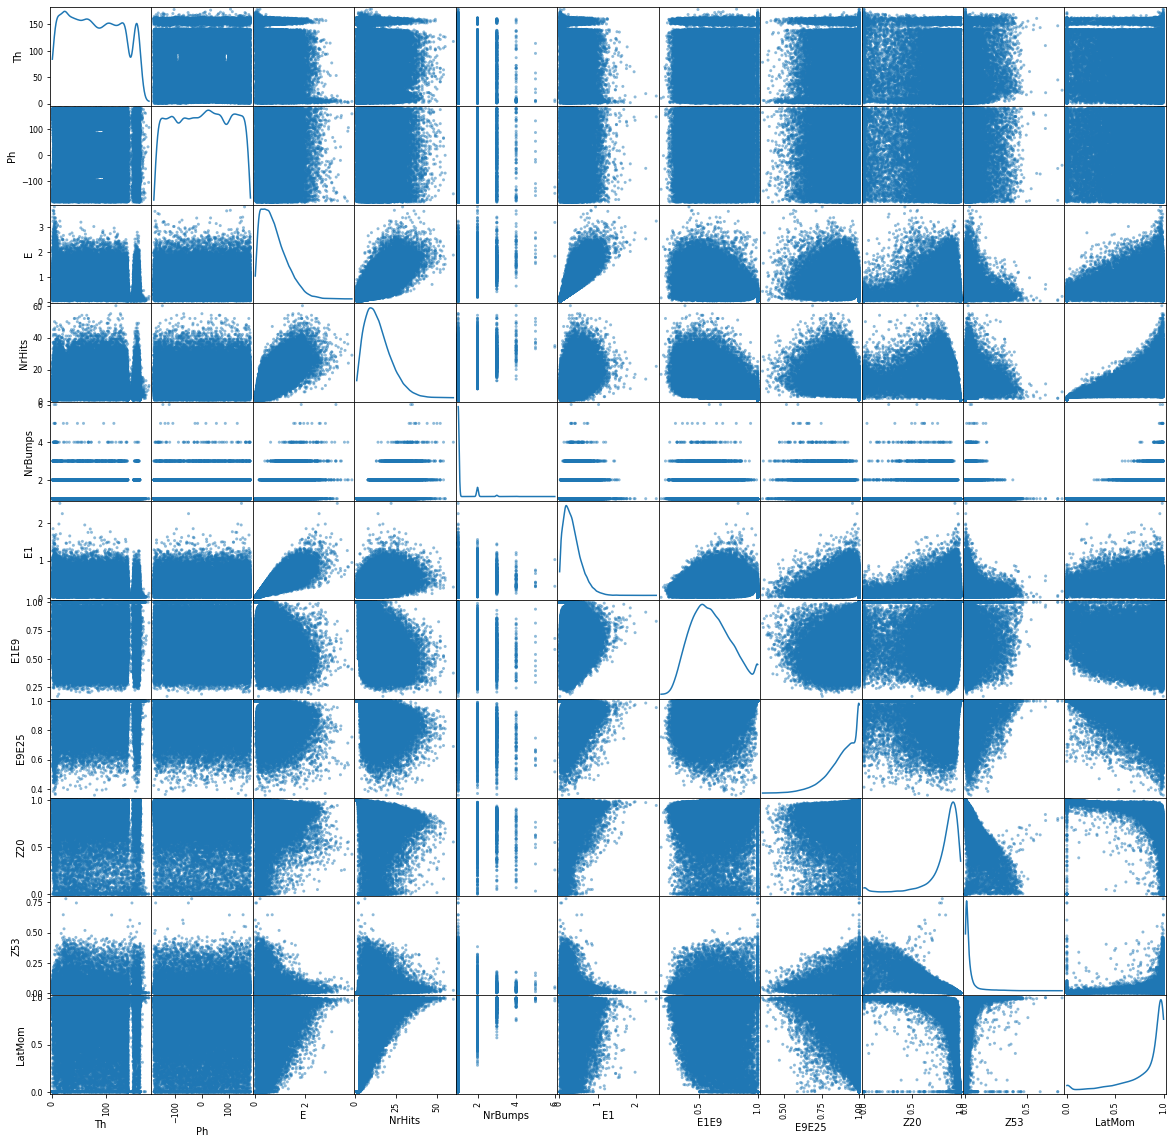

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

neutrons = pd.read_csv('emc_neutron.txt')

pd.plotting.scatter_matrix(neutrons, figsize=(20,20), diagonal='kde')
plt.show()

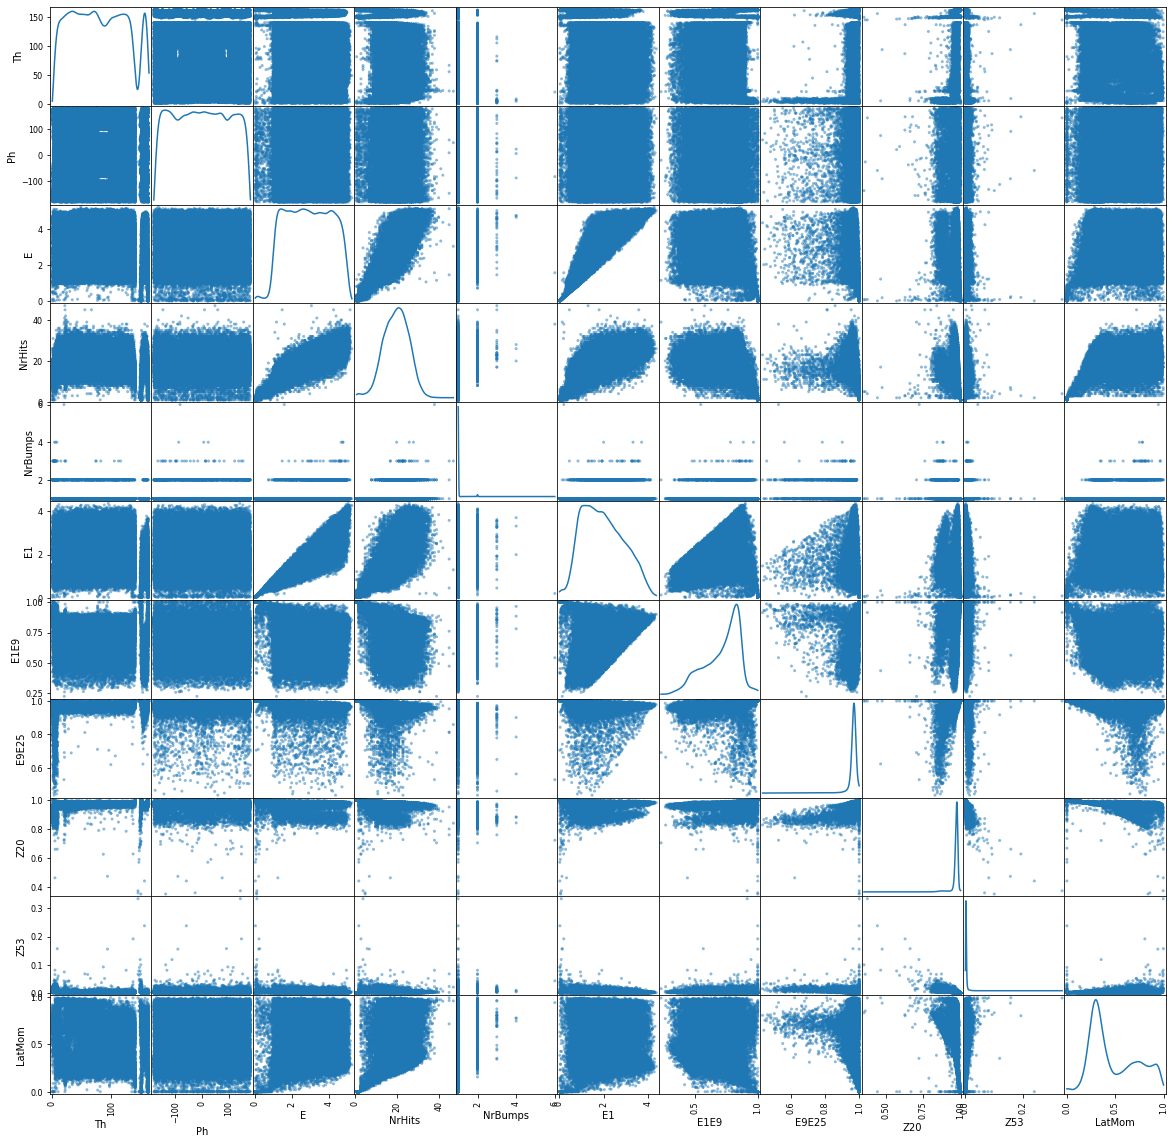

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

gamma = pd.read_csv('emc_gam.txt')

pd.plotting.scatter_matrix(gamma, figsize=(20,20), diagonal='kde')
plt.show()

In [ ]:
#Part 2 
#biggest differences from the neutron and gamma is E1, E, Nrhits, Nrbumps, E1E9, LatMom

In [ ]:
#Normalizing these parameters
import matplotlib.pyplot as plt
import pandas as pd

gamma = pd.read_csv('emc_gam.txt')

neutrons = pd.read_csv('emc_neutron.txt')


neutrons['E_normal'] = ( neutrons.E - neutrons.E.mean() ) / neutrons.E.std()
neutrons['E1_normal']        = ( neutrons.E1        - neutrons.E1.mean() )        / neutrons.E1.std()
neutrons['E1E9_normal']     = ( neutrons.E1E9     - neutrons.E1E9.mean() )     / neutrons.E1E9.std()
neutrons['NrHits_normal']       = ( neutrons.NrHits       - neutrons.NrHits.mean() )       / neutrons.NrHits.std()
neutrons['NrBumps_normal']       = ( neutrons.NrBumps       - neutrons.NrBumps.mean() )       / neutrons.NrBumps.std()
neutrons['LatMom_normal']       = ( neutrons.LatMom       - neutrons.LatMom.mean() )       / neutrons.LatMom.std()
neutrons['Photon/Neutron']=0

gamma['E*_normal'] = ( gamma.E - gamma.E.mean() ) / gamma.E.std()
gamma['E1*_normal']        = ( gamma.E1        - gamma.E1.mean() )        / gamma.E1.std()
gamma['E1E9*_normal']     = ( gamma.E1E9     - gamma.E1E9.mean() )     / gamma.E1E9.std()
gamma['NrHits*_normal']       = ( gamma.NrHits       - gamma.NrHits.mean() )       / gamma.NrHits.std()
gamma['NrBumps*_normal']       = ( gamma.NrBumps       - gamma.NrBumps.mean() )       / gamma.NrBumps.std()
gamma['LatMom*_normal']       = ( gamma.LatMom       - gamma.LatMom.mean() )       / gamma.LatMom.std()
gamma['Photon/Neutron'] = 1

print(gamma)
print(neutrons)

             Th          Ph  ...  LatMom*_normal  Photon/Neutron
0       50.8457   -0.008022  ...       -0.450384               1
1       22.9273 -119.515000  ...        0.786359               1
2      130.3010 -126.725000  ...       -0.733086               1
3      160.2830   59.330500  ...        0.851762               1
4       89.4000  -15.521300  ...        1.635244               1
...         ...         ...  ...             ...             ...
43355   61.9661  -60.423900  ...       -0.403818               1
43356   22.4791   64.485300  ...        1.096953               1
43357  119.5940  148.674000  ...       -0.903902               1
43358  113.1480  -72.601400  ...       -0.530761               1
43359  124.7670 -121.904000  ...        1.126156               1

[43360 rows x 18 columns]
             Th         Ph  ...  LatMom_normal  Photon/Neutron
0       49.9085    2.28061  ...      -0.318222               0
1       91.4437   50.85850  ...       0.411991               0
2   

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


neutrons[['E_normal', 'E1_normal', 'E1E9_normal', 'NrHits_normal', 'NrBumps_normal', 'LatMom_normal']].describe()

,E_normal,E1_normal,E1E9_normal,NrHits_normal,NrBumps_normal,LatMom_normal
count,4.351200e+04,4.351200e+04,4.351200e+04,4.351200e+04,4.351200e+04,4.351200e+04
mean,-1.864898e-15,-3.056915e-15,3.435325e-15,1.217489e-16,1.628674e-15,2.650129e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.464786e+00,-1.457394e+00,-2.500640e+00,-1.613725e+00,-3.209979e-01,-2.785443e+00
25%,-7.826932e-01,-7.555367e-01,-7.674563e-01,-7.400500e-01,-3.209979e-01,-4.350983e-01
50%,-1.862837e-01,-1.841308e-01,-1.013597e-01,-1.159961e-01,-3.209979e-01,4.719438e-01
75%,5.857202e-01,5.463098e-01,6.942090e-01,6.328686e-01,-3.209979e-01,7.405585e-01
max,6.115574e+00,9.536033e+00,2.192403e+00,5.750110e+00,1.277413e+01,8.356453e-01


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


gamma[['E*_normal', 'E1*_normal', 'E1E9*_normal', 'NrHits*_normal', 'NrBumps*_normal', 'LatMom*_normal']].describe()

,E*_normal,E1*_normal,E1E9*_normal,NrHits*_normal,NrBumps*_normal,LatMom*_normal
count,4.336000e+04,4.336000e+04,4.336000e+04,4.336000e+04,4.336000e+04,4.336000e+04
mean,5.203274e-15,1.136562e-14,-1.213879e-14,-2.918138e-16,-8.886124e-16,-1.149804e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.438603e+00,-2.168963e+00,-3.500907e+00,-3.180293e+00,-1.431263e-01,-1.978281e+00
25%,-8.449423e-01,-8.164739e-01,-6.841280e-01,-6.352730e-01,-1.431263e-01,-7.978662e-01
50%,-5.537766e-03,-9.417515e-02,2.679726e-01,4.339917e-02,-1.431263e-01,-4.048754e-01
75%,8.591849e-01,7.474467e-01,7.792199e-01,7.220713e-01,-1.431263e-01,8.926561e-01
max,1.976788e+00,2.667699e+00,2.016359e+00,4.624436e+00,3.214593e+01,2.102946e+00


In [ ]:
neutrons = neutrons[:len(gamma)] #slicing dataframes to ensure that theres the same amount of data in neutrons and gamma
print(len(gamma))
print(len(neutrons))

43360
43360


In [ ]:
#normalizing into one dataframe
import numpy as np 
neutronsnormal=[]
gammanormal=[]

neutronsnormal.append((neutrons.E - neutrons.E.mean())/neutrons.E.std())
neutronsnormal.append((neutrons.NrHits - neutrons.NrHits.mean())/neutrons.NrHits.std())
neutronsnormal.append((neutrons.NrBumps - neutrons.NrBumps.mean())/neutrons.NrBumps.std())
neutronsnormal.append((neutrons.E1 - neutrons.E1.mean())/neutrons.E1.std())
neutronsnormal.append((neutrons.E9E25 - neutrons.E9E25.mean())/neutrons.E9E25.std())
neutronsnormal.append((neutrons.LatMom - neutrons.LatMom.mean())/neutrons.LatMom.std())


gammanormal.append((gamma.E - gamma.E.mean())/gamma.E.std())
gammanormal.append((gamma.NrHits - gamma.NrHits.mean())/gamma.NrHits.std())
gammanormal.append((gamma.NrBumps - gamma.NrBumps.mean())/gamma.NrBumps.std())
gammanormal.append((gamma.E1 - gamma.E1.mean())/gamma.E1.std())
gammanormal.append((gamma.E9E25 - gamma.E9E25.mean())/gamma.E9E25.std())
gammanormal.append((gamma.LatMom - gamma.LatMom.mean())/gamma.LatMom.std())


neutronsnormal = pd.DataFrame(neutronsnormal).T
gammanormal = pd.DataFrame(gammanormal).T
dfnormal = [neutronsnormal, gammanormal]
dfnormal = pd.concat(dfnormal)

print(dfnormal)

              E    NrHits   NrBumps        E1     E9E25    LatMom
0     -1.111849 -1.239647 -0.321060 -0.741734  1.053308 -0.318370
1     -0.483486  0.008715 -0.321060 -0.634116  0.531002  0.411930
2      1.228331  1.007405  2.297178  1.250055 -0.124111  0.109793
3      0.392025  0.508060  2.297178  0.016169 -0.590100  0.503890
4     -0.000878  0.008715 -0.321060  0.652837 -0.927565  0.633454
...         ...       ...       ...       ...       ...       ...
43355 -0.299130  0.382735 -0.143126 -0.152439 -0.558311 -0.403818
43356 -0.300012 -0.635273 -0.143126  0.021575  0.714465  1.096953
43357 -0.521279 -0.295937 -0.143126 -0.351116  0.221057 -0.903902
43358 -0.905664 -0.126269 -0.143126 -0.700232  0.411815 -0.530761
43359  0.741853  0.213067 -0.143126  0.363674  0.069157  1.126156

[86720 rows x 6 columns]


In [ ]:
u=['Neutron']*43360
v=['Photon']*43360
x=np.array([u, v])
y=x.flatten()
dfnormal['Photon/Neutron'] = y
print(dfnormal)

              E    NrHits   NrBumps  ...     E9E25    LatMom  Photon/Neutron
0     -1.111849 -1.239647 -0.321060  ...  1.053308 -0.318370         Neutron
1     -0.483486  0.008715 -0.321060  ...  0.531002  0.411930         Neutron
2      1.228331  1.007405  2.297178  ... -0.124111  0.109793         Neutron
3      0.392025  0.508060  2.297178  ... -0.590100  0.503890         Neutron
4     -0.000878  0.008715 -0.321060  ... -0.927565  0.633454         Neutron
...         ...       ...       ...  ...       ...       ...             ...
43355 -0.299130  0.382735 -0.143126  ... -0.558311 -0.403818          Photon
43356 -0.300012 -0.635273 -0.143126  ...  0.714465  1.096953          Photon
43357 -0.521279 -0.295937 -0.143126  ...  0.221057 -0.903902          Photon
43358 -0.905664 -0.126269 -0.143126  ...  0.411815 -0.530761          Photon
43359  0.741853  0.213067 -0.143126  ...  0.069157  1.126156          Photon

[86720 rows x 7 columns]


In [ ]:
#
# The engine code behind the ML algorithm used in this example.
# We make use of kNN classifier:
#

def kNN_classify(data, 
                 k=15, 
                 prop_test=0.3, 
                 feature_list=['NrHits','NrBumps'],
                 plot_ds=False):
    """
    Use kNN algorithm to classify dataset data. Use feature list feature_list
    and use prop_test fraction of the data as test sample, rest for training.
    The function returns an updated dataset including a column with predicted class.
    """
    
    assert 0<prop_test<1
     
    #
    # make a copy of the dataframe. The original table will not be altered.
    #
    data_tmp = dfnormal.copy()
    #
    # Add a column specifying whether event is used for training or for testing
    #
    data_tmp['is_train'] = np.random.uniform(0, 1, len(data_tmp)) <= (1-prop_test)
    #
    # Extract two seperate datasets for training (train) and testing (test)
    #
    train, test = data_tmp[data_tmp['is_train']==True], data_tmp[data_tmp['is_train']==False]
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(train[feature_list],train['Photon/Neutron'])
    
    #evaluate the training points
    trainpred = clf.predict(train[feature_list])
    train['prediction'] = [x for x in trainpred]
   
    # Predict on the testing points       
    testpred = clf.predict(test[feature_list])
    test['prediction'] = [x for x in testpred]
 
    data_update = train.append(test)
     
    if (plot_ds) & (len(feature_list)==2):
        plot_decision_surface(clf,data_update,feature_list)
        
    return data_update


#
# getNrOfSuccesses(dataFrame): returns fraction of succesfull classifications for training and test 
#                              part of the data table
#

def getNrOfSuccesses(data):
    """
    Reads as input DataFrame "data" and return the fraction of successfull classifications of
    the training and test part of the table. This function only works with an updated DataFrame
    that includes the columns "is_train" and "prediction", generated by kNN_classify() function.
    """
    
    nrtrain_instances = len(data[(data.is_train == True)])
    nrtest_instances  = len(data[(data.is_train == False)])
    
    nrtrain_success = len(data[(data.is_train == True)  & (data.prediction == data.Photon/Neutron)])
    nrtest_success  = len(data[(data.is_train == False) & (data.prediction == data.Photon/Neutron)])
    
    return (nrtrain_success/nrtrain_instances), (nrtest_success/nrtest_instances)

#
# plot_decision_surface: function that creates decision surface based on classifier clf
# and features in feature_list of dataFrame data. It uses "meshgrid" of numpy to generate
# grid of points to evaluate by classifier. For plotting, it uses "pcolormesh" of matplotlib.
#

def plot_decision_surface(clf, data, feature_list, step=0.02):
    """
    Function that creates a decision surface of classifier "clf"
    together with features from the two entries of the "features_list" of "data"
    """
    X = data[feature_list[0]].values
    Y = data[feature_list[1]].values
    
    # colors associated with the three classes, light is used for surface and bold for datapoints
    cmap_light = ListedColormap(['#ffde9e', '#b8ea9d', '#ffbaba'])
    cmap_bold  = ListedColormap(['#ff8c28', '#11bb11', '#ff0000'])
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max] x [y_min, y_max].
    x_min, x_max = X.min(), X.max()
    y_min, y_max = Y.min(), Y.max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Put the result into a color plot
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    # Plot the data points
    plt.scatter(X, Y, s=40, c=data['Photon/Neutron'], cmap=cmap_bold)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel(feature_list[0])
    plt.ylabel(feature_list[1])
    plt.show()
    return